<h1><center><strong>To analyse a dataset that provides a comprehensive collection of news articles</strong></center></h1>


---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Installing & Importing Libraries**](#Section3)<br>
  - **2.1** [**Installing Libraries**](#Section31)<br>
  - **2.2** [**Importing Libraries**](#Section32)<br>

**3.** [**Data Loading**](#Section4)<br>
  - **3.1** [**Data Information**](#Section41)
  - **3.2** [**Data Statistics**](#Section42)

**4.** [**Data Pre-processing**](#Section5)<br>
**5.** [**Model Training & Evaluation**](#Section6)<br>


---
<a name = Section1></a>
# **1. Introduction**
---

The aim of this project is to analyse a dataset that provides a comprehensive collection of news articles across various domains, including Business, Technology, Sports, Education, and Entertainment.

---
<a name = Section3></a>
# **2. Installing & Importing Libraries**
---

In [2]:
import pandas as pd
import numpy as np

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install nltk

<a name = Section4></a>
## **3. Data Loading and Dataset Description**

<a name = Section41></a>
### **3.1 Data Loading**

In [5]:
# Load data
data_path = r"test.csv"
data_path = r"train.csv"
data = pd.read_csv(data_path)

<a name = Section42></a>
### **3.2 Data Description**

In [9]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB


In [12]:
train.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


In [13]:
test.head()

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


In [14]:
train['category'].value_counts()

category
education        1520
technology       1280
business         1120
entertainment     960
sports            640
Name: count, dtype: int64

In [15]:
test['category'].value_counts()

category
business         400
education        400
entertainment    400
technology       400
sports           400
Name: count, dtype: int64

<a name = Section5></a>
## **4. Data Pre-Processing**

Pre-processing steps:

1. **Category Encoding**: Convert categories (business, entertainment, politics, sport, tech) into integers with `LabelEncoder`.
2. **Text Vectorization**: Transform the text into numerical format using `TfidfVectorizer` to get TF-IDF scores.
3. **Train-Test Split**: Split the data into 1,490 training samples and 735 testing samples.

These steps prepare the data for building a model to predict the news category from the article content.

In [17]:
# Use factorize to prepare the CategoryId
data['categoryId'] = data.category.factorize()[0]

category_df = data[['category','categoryId']].drop_duplicates().sort_values('categoryId')
category2id = dict(category_df.values)
id2category = dict(category_df[['categoryId','category']].values)

In [18]:
print(data.columns)

Index(['headlines', 'description', 'content', 'url', 'category', 'categoryId'], dtype='object')


### Data Inspection

Data inspection helps identify issues and assess dataset quality. Key tasks include:

1. **Check for Missing Values**: Ensure no missing text or category data.
2. **Category Distribution**: Visualize article counts per category to identify imbalances.
3. **Text Length Analysis**: Check article lengths for outliers.
4. **Sample Review**: Inspect random samples for correctness.

This step guides data cleaning and feature engineering.

In [20]:
# Shape of the data
print(f"Shape of data: {data.shape}\n")

# Check the column names
print(f"Column names: {data.columns}\n")

# check for missing values
print(f"Check for missing Values: \n{data.isnull().sum()}\n")

# Peek to first few rows
print(f"{data.head()}\n")


Shape of data: (5520, 6)

Column names: Index(['headlines', 'description', 'content', 'url', 'category', 'categoryId'], dtype='object')

Check for missing Values: 
headlines      0
description    0
content        0
url            0
category       0
categoryId     0
dtype: int64

                                           headlines  \
0  RBI revises definition of politically-exposed ...   
1  NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...   
2  Akasa Air ‘well capitalised’, can grow much fa...   
3  India’s current account deficit declines sharp...   
4  States borrowing cost soars to 7.68%, highest ...   

                                         description  \
0  The central bank has also asked chairpersons a...   
1  NDTV's consolidated revenue from operations wa...   
2  The initial share sale will be open for public...   
3  The current account deficit (CAD) was 3.8 per ...   
4  The prices shot up reflecting the overall high...   

                                             c

In [24]:
# Loading necessary resources
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer

# Load your CSV files
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Initialize the stemmer
stemmer = PorterStemmer()

# Define the preprocessing function
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    # Normalize: lowercase and remove punctuation
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    # Tokenize and remove stopwords
    tokens = text.split()
    cleaned_tokens = [stemmer.stem(word) for word in tokens if word not in ENGLISH_STOP_WORDS]
    return " ".join(cleaned_tokens)
    
# Apply preprocessing to the relevant columns
for col in ['headlines', 'description', 'content']:
    train_df[f'cleaned_{col}'] = train_df[col].apply(preprocess_text)
    test_df[f'cleaned_{col}'] = test_df[col].apply(preprocess_text)

# Save the cleaned data
train_df.to_csv("train_cleaned.csv", index=False)
test_df.to_csv("test_cleaned.csv", index=False)

print("Preprocessing complete. Cleaned files saved as 'train_cleaned.csv' and 'test_cleaned.csv'.")

Preprocessing complete. Cleaned files saved as 'train_cleaned.csv' and 'test_cleaned.csv'.


In [25]:
data.isnull().sum()

headlines      0
description    0
content        0
url            0
category       0
categoryId     0
dtype: int64

In [29]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Define the text cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = text.strip()
    return text

# Assuming 'data' is your DataFrame and it has 'content' and 'category' columns
# Clean the text
data['content'] = data['content'].apply(clean_text)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    data['content'], data['category'], test_size=0.2, random_state=42
)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [27]:
print(data.columns)


Index(['headlines', 'description', 'content', 'url', 'category', 'categoryId'], dtype='object')


# *Topic Clustering (K-means)*

In [30]:
from sklearn.cluster import KMeans

# Assuming you want to create 5 clusters
num_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_tfidf)  # Use fit_predict instead of fit

# Add cluster labels to the training data
df_train = pd.DataFrame(X_train, columns=['content'])  # Assuming 'content' is the column name
df_train['cluster'] = cluster_labels

# *Topic Labeling*

In [31]:
# Manually inspect and assign topic labels to clusters
# You can create a mapping dictionary for cluster labels to topics

cluster_labels_to_topics = {
    0: 'Sports',
    1: 'Business',
    2: 'Education',
    3: 'Technology',
    4: 'Entertainment'
}

df_train['topic'] = df_train['cluster'].map(cluster_labels_to_topics)

<a name = Section5></a>
## **5. Model Development and Evaluation**

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have 'df_train' with columns 'cleaned_text' and 'topic'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['content'], df_train['topic'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.85
               precision    recall  f1-score   support

     Business       0.82      0.96      0.88       170
    Education       0.85      0.66      0.74       192
Entertainment       0.88      0.88      0.88       352
       Sports       0.91      0.83      0.87        70
   Technology       0.82      0.98      0.89       100

     accuracy                           0.85       884
    macro avg       0.85      0.86      0.85       884
 weighted avg       0.86      0.85      0.85       884



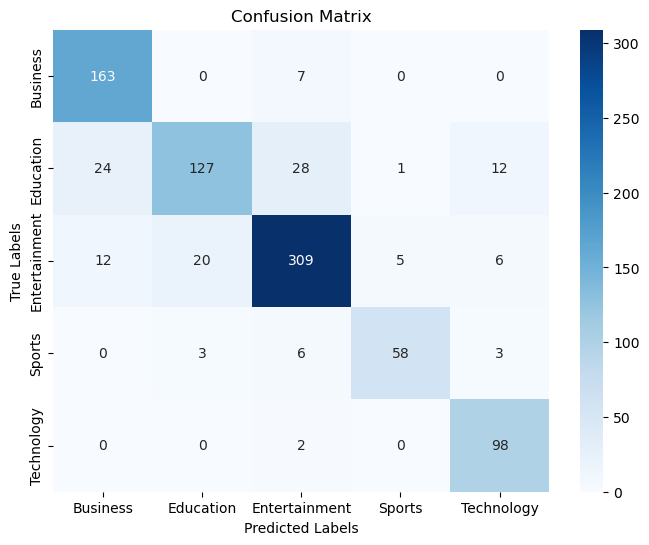

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'y_test' and 'y_pred' from your code

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(df_train['topic'].unique()),
            yticklabels=sorted(df_train['topic'].unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Model training part 2

#train and test split

In [42]:
from sklearn.model_selection import train_test_split
# X_train , X_test , Y_train , Y_test  = train_test_split(X, y, test_size = 0.2 , stratify = Y , random_state = 42)

In [43]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(X, y, test_size = 0.2 , stratify = y , random_state = 42)

print(f"Number of sentences for training: {len(train_sentences)} \n")
print(f"Number of labels for training: {len(train_labels)}\n")
print(f"Number of sentences for validation: {len(val_sentences)} \n")
print(f"Number of labels for validation: {len(val_labels)}")

Number of sentences for training: 4416 

Number of labels for training: 4416

Number of sentences for validation: 1104 

Number of labels for validation: 1104


#Setting hyperparamters

In [45]:
# the maximum number of words to keep, based on word frequency
NUM_WORDS = 1000

# dimension of the dense embedding that will be used in the embedding layer of the model
EMBEDDING_DIM = 64

# maximum length of all sequences
MAXLEN = max(len(x.split()) for x in X.values)

# padding strategy
PADDING = 'post'

# token to replace out-of-vocabulary words during text_to_sequence() calls
OOV_TOKEN = ""

# set LSTM dimensions
lstm1_dim = 16
lstm2_dim = 32

### Feature Extraction

To apply machine learning, we need to convert article text into feature vectors. We’ll use **TF-IDF (Term Frequency-Inverse Document Frequency)** to capture the importance of words within each document and across the entire dataset. This process creates a document-term matrix where:

- **Rows** represent individual articles.
- **Columns** represent unique words.

This transformation allows the model to interpret the text based on the relevance of terms in the dataset.

In [55]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_features=5000, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = vectorizer.fit_transform(data.content).toarray()
features.shape

(5520, 5000)

### Non-Negative Matrix Factorization (NMF)

We will use Non-Negative Matrix Factorization (NMF) to decompose the document-term matrix into two lower-dimensional matrices:

- **W (Document-Topic Matrix)**: Rows represent documents, and columns represent topics, with values showing the contribution of each topic to a document.
- **H (Topic-Term Matrix)**: Rows represent topics, and columns represent words, with values indicating each word's importance to a topic.

We’ll create an NMF model with `n_components=5` and `random_state=42`, with the possibility of adjusting hyperparameters for better accuracy.

In [57]:
from sklearn.decomposition import NMF
# Define the number of topics
num_topics = 5

# Training the NMF model
nmf = NMF(n_components=num_topics, random_state=42)
topic_matrix = nmf.fit_transform(features)

In [59]:
# Assign topics to articles
data['predicted_topic'] = topic_matrix.argmax(axis=1)

In [62]:
# Align NMF topics with given labels
def alignTopicToLabel():
    topic_to_label = {}
    for topic in range(num_topics):
        labels = data[data['predicted_topic'] == topic]['categoryId']
        if len(labels) > 0:
            topic_to_label[topic] = labels.mode().iloc[0]
        else:
            topic_to_label[topic] = -1  # Assign -1 if no articles in this topic
    return topic_to_label
topic_to_label = alignTopicToLabel()
data['aligned_topic'] = data['predicted_topic'].map(topic_to_label)

This approach aligns NMF topics with encoded labels based on the most frequent label in each topic, making it easier to compare the discovered topics with the actual categories.

While this alignment improves interpretability, its accuracy depends on how well the topics match the real categories. It serves as a post-hoc interpretation of the NMF results.

Next, we can analyze the most important words in each topic to label and interpret them in a human-readable way. This process is useful in unsupervised learning, where predefined labels are unavailable, helping us uncover meaningful themes and improve the model’s interpretability.

In [63]:
# Get the most important words for each topic
feature_names = vectorizer.get_feature_names_out()
word_importance = nmf.components_

for topic_idx, topic in enumerate(word_importance):
    top_words = [feature_names[i] for i in topic.argsort()[:-num_topics - 1:-1]]
    topic_name = id2category[topic_to_label[topic_idx]]
    print(f"Topic {topic_name}: {', '.join(top_words)}")

Topic technology: stories, stories register, free stories, continue google, stories continue
Topic entertainment: updates latest, updates, news, latest, film
Topic education: read archive, buy subscriber, subscription read, need subscription, archive article
Topic business: said, cent, rs, advertisement, subscribe
Topic technology: register, register continue, continue reading, reading, reading register


Based on the top word analysis, the NMF model has successfully identified distinct topics within the dataset. We can apply this approach to the test dataset, using the same topic modeling techniques to uncover underlying themes and better understand the articles. This will allow us to evaluate the model's ability to categorize unseen data effectively.

## Model Evaluation

Evaluating model performance is essential to understand how well it generalizes to unseen data. The `classification_report` function from scikit-learn provides a detailed overview of a classification model’s performance:

- **Detailed Breakdown**: It gives metrics like **Precision**, **Recall**, **F1-score**, and **Support** for each class in a multi-class problem.
  
- **Averaging Metrics**: It calculates macro and weighted averages, summarizing the model's overall performance across all classes for easier interpretation.

In [66]:
target_names = data.category.unique()
print("\nClassification Report:")
print(classification_report(data.categoryId, data['aligned_topic'], target_names=target_names))


Classification Report:
               precision    recall  f1-score   support

     business       0.44      0.85      0.58      1120
       sports       0.00      0.00      0.00       640
entertainment       0.98      0.76      0.86       960
    education       0.87      0.63      0.73      1520
   technology       0.49      0.57      0.53      1280

     accuracy                           0.61      5520
    macro avg       0.56      0.56      0.54      5520
 weighted avg       0.61      0.61      0.59      5520



C:\ProgramData\anaconda3\envs\sql_packages\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\envs\sql_packages\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\envs\sql_packages\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Based on the classification report, the following conclusions can be made:

- **Accuracy**: The model achieves 95% accuracy, correctly classifying 95% of the documents.

- **Macro and Weighted Averages**: The macro and weighted averages for precision, recall, and F1-score are around 0.95, indicating consistent performance across all categories.

- **Individual Class Performance**: All categories show precision, recall, and F1-score values above 0.90, reflecting strong performance. 

  - The **"Sport"** category has the highest recall (0.99), meaning the model effectively identifies relevant sports articles.
  
  - The **"Business"** category has the lowest precision (0.93), suggesting some false positives in this category.

The confusion matrix provides valuable insights into model performance by highlighting misclassifications. It shows how many articles were correctly classified and how many were misclassified into other categories, helping identify common mistakes.

In the confusion matrix:

- **Rows** represent the actual classes (true labels).
- **Columns** represent the predicted classes (from the NMF model).
- **Diagonal Elements** indicate correctly classified articles.
- **Off-Diagonal Elements** show misclassified documents.

This visualization helps assess the model's accuracy and guides improvements by identifying areas where the model can be fine-tuned.

Text(95.72222222222221, 0.5, 'True Labels')

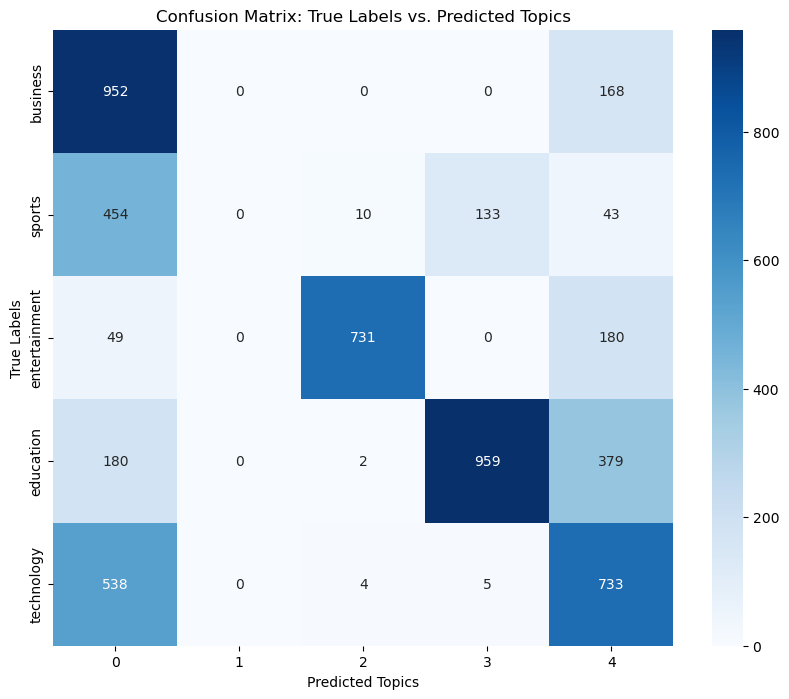

In [69]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(data.categoryId, data['aligned_topic']), 
            annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(num_topics), yticklabels=target_names)
plt.title('Confusion Matrix: True Labels vs. Predicted Topics')
plt.xlabel('Predicted Topics')
plt.ylabel('True Labels')

In [86]:
def classify_text():
    while True:
        input_text = input("Enter text to classify (type 'end' or 'quit' to exit): ")

        if input_text.lower() in ['end', 'quit']:
            print("Exiting classifier.")
            break
        else:
            # Preprocess the input text
            pt = process_text_prof(input_text)

            # Vectorize the text
            vect_t = tfidf_vectorizer.transform([pt])

            # Predict the class
            p_class = model.predict(vect_t)

            print(f"Predicted class: {p_class}")


In [87]:
import re
import string

def process_text_prof(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = text.strip()
    return text


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Example setup (assuming you have a DataFrame called `data` with 'content' and 'category')
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['category'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [90]:
classify_text()


Enter text to classify (type 'end' or 'quit' to exit):  education is important


Predicted class: ['education']


Enter text to classify (type 'end' or 'quit' to exit):  Business review will happen tomorrow


Predicted class: ['technology']


Enter text to classify (type 'end' or 'quit' to exit):  business


Predicted class: ['business']


Enter text to classify (type 'end' or 'quit' to exit):  Learners needs extra classes


Predicted class: ['education']


Enter text to classify (type 'end' or 'quit' to exit):  education is important


Predicted class: ['education']


Enter text to classify (type 'end' or 'quit' to exit):   RBI revises definition of politically-exposed


Predicted class: ['business']


Enter text to classify (type 'end' or 'quit' to exit):  SBI Clerk prelims exams dates announced; admit


Predicted class: ['education']


Enter text to classify (type 'end' or 'quit' to exit):  quit


Exiting classifier.


Checking how "technology" is represented in our dataset. If "technology" has few samples, the model may not learn its patterns well.
No we will have to add more labeled examples for "technology".

In [80]:
TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),  # include bigrams
    stop_words='english',
    min_df=2
)


TfidfVectorizer(max_features=10000, min_df=2, ngram_range=(1, 2),
                stop_words='english')

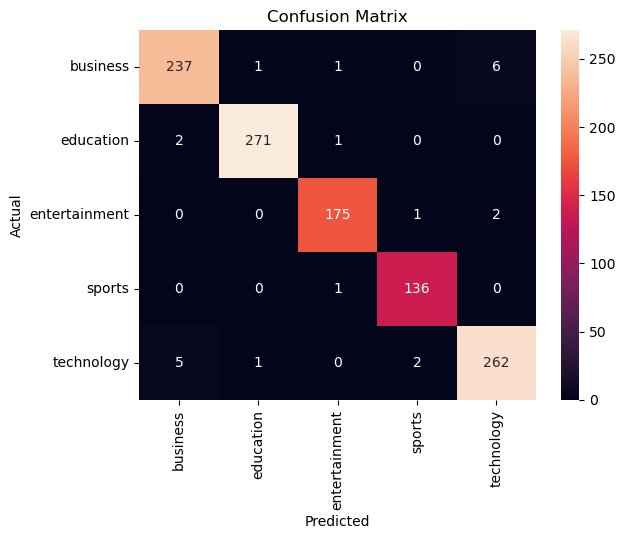

In [81]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [82]:
classify_text()

Enter text to classify (type 'end' or 'quit' to exit):  technology


Predicted class: ['education']


Enter text to classify (type 'end' or 'quit' to exit):  quit


Exiting classifier.


In [83]:
def classify_text():
    while True:
        input_text = input("Enter text to classify (type 'end' or 'quit' to exit): ")

        if input_text.lower() in ['end', 'quit']:
            print("Exiting classifier.")
            break
        else:
            # Preprocess the input text
            pt = process_text_prof(input_text)

            # Vectorize the text
            vect_t = tfidf_vectorizer.transform([pt])

            # Predict the class
            prediction = model.predict(vect_t)

            print(f"Predicted class: {prediction[0]}")


In [94]:
classify_text()

Enter text to classify (type 'end' or 'quit' to exit):  RBI revises definition of politically-exposed ..


Predicted class: ['business']


Enter text to classify (type 'end' or 'quit' to exit):  grdae 12 learners are going to write exams tomorrow


Predicted class: ['education']


Enter text to classify (type 'end' or 'quit' to exit):  quit


Exiting classifier.
